In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv("D:\Py Django\DataScience\Decision Tree\Regression\IceCreamData.csv")
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
x = df[['Temperature']]
y = df['Revenue']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=7,           
    min_samples_split=4,   
    min_samples_leaf=3     
)
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,7
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
x_pred = model.predict(x_test)
x_pred

array([697.26255542, 648.43086583, 589.24798187, 529.38185157,
       603.0925003 , 279.32381118, 294.90213567, 312.88319184,
       529.38185157, 697.26255542, 721.3607636 , 391.85872544,
       400.339862  , 659.77739387,  61.40082928, 208.7273734 ,
       536.09593613, 575.61936957, 567.48126365, 697.26255542,
       537.89455677, 767.62005993, 678.06911224, 541.16562897,
       912.26793053, 659.77739387, 312.88319184, 648.43086583,
       755.90422134, 684.459262  , 449.30317513, 484.45000297,
       715.80132957, 804.883271  , 647.40072351, 494.89120157,
       755.90422134, 338.72469862, 263.14625895,  61.40082928,
       567.48126365, 245.0465422 , 550.32855703, 380.86284812,
       449.30317513, 601.08975314, 566.28162891,  61.40082928,
       484.45000297, 537.06108961, 620.71104929, 529.38185157,
       470.82414689, 529.38185157, 550.32855703, 648.43086583,
       566.28162891, 659.77739387, 177.8554538 , 659.77739387,
       567.48126365, 684.459262  , 537.06108961, 648.43

In [8]:
print("Mean Squared Error:",mean_squared_error(y_test,x_pred))

Mean Squared Error: 1036.0994201992437


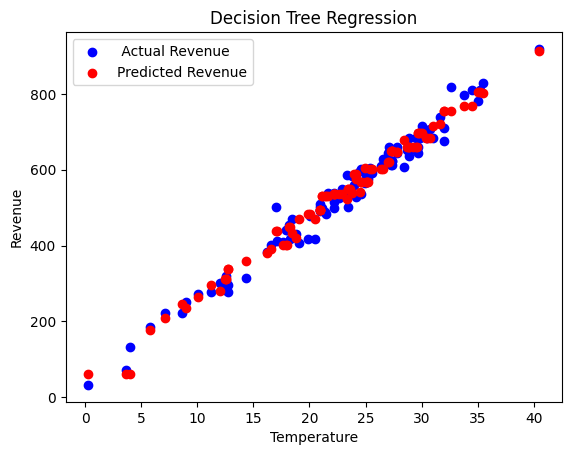

In [9]:
plt.scatter(x_test,y_test,color="blue",label = " Actual Revenue")
plt.scatter(x_test,x_pred,color = "red",label = "Predicted Revenue")
plt.title("Decision Tree Regression")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [10]:
x_grid = np.arange(min(x['Temperature']), max(x['Temperature']),0.01).reshape(-1,1)
y_grid_pred = model.predict(x_grid)

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


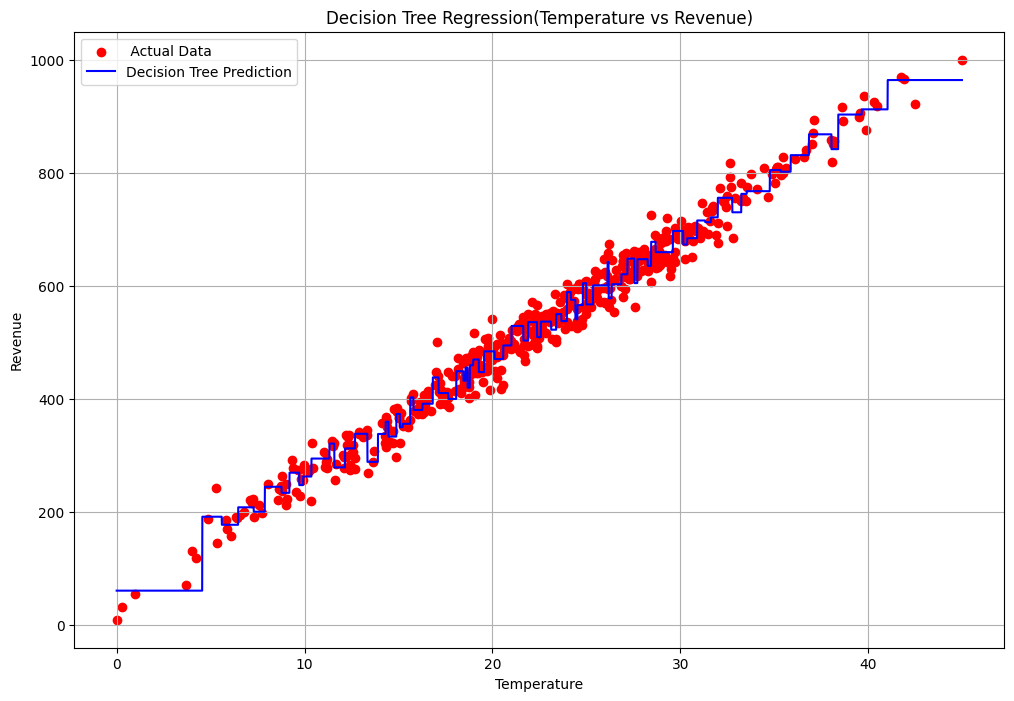

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,color="red",label = " Actual Data")
plt.plot(x_grid, y_grid_pred , color = "blue",label = "Decision Tree Prediction")
plt.title("Decision Tree Regression(Temperature vs Revenue)")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pickle

filename = "Task3.pkl"
pickle.dump(model, open(filename, "wb"))

print("Model saved successfully!")



Model saved successfully!


In [15]:
loaded_model = pickle.load(open("Task3.pkl", "rb"))
y_pred_loaded = loaded_model.predict(x_test)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)

print("Loaded Model MSE:", mse_loaded)

root = np.sqrt(mse_loaded)
root

r_mse = r2_score(y_test, y_pred_loaded)
r_mse

Loaded Model MSE: 1036.0994201992437


0.9637229941202563